# Import libraries

In [55]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Gain information about data

In [56]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [57]:
data = pd.read_csv('/content/drive/MyDrive/Data Scientist/Machine learning/Task#2 dataset/stars.csv')
data.head()

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0


In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Temperature     240 non-null    int64  
 1   L               240 non-null    float64
 2   R               240 non-null    float64
 3   A_M             240 non-null    float64
 4   Color           240 non-null    object 
 5   Spectral_Class  240 non-null    object 
 6   Type            240 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 13.2+ KB


In [59]:
data.describe()

,Temperature,L,R,A_M,Type
count,240.000000,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396,2.500000
std,9552.425037,179432.244940,517.155763,10.532512,1.711394
min,1939.000000,0.000080,0.008400,-11.920000,0.000000
25%,3344.250000,0.000865,0.102750,-6.232500,1.000000
50%,5776.000000,0.070500,0.762500,8.313000,2.500000
75%,15055.500000,198050.000000,42.750000,13.697500,4.000000
max,40000.000000,849420.000000,1948.500000,20.060000,5.000000


## Percentage of null values per variable

In [60]:
for cat in data:
    len_cat = len(data[cat])
    print(f'{cat}: {np.round(data[cat].isnull().sum()/len_cat,3)}, N: {len_cat}')

Temperature: 0.0, N: 240
L: 0.0, N: 240
R: 0.0, N: 240
A_M: 0.0, N: 240
Color: 0.0, N: 240
Spectral_Class: 0.0, N: 240
Type: 0.0, N: 240


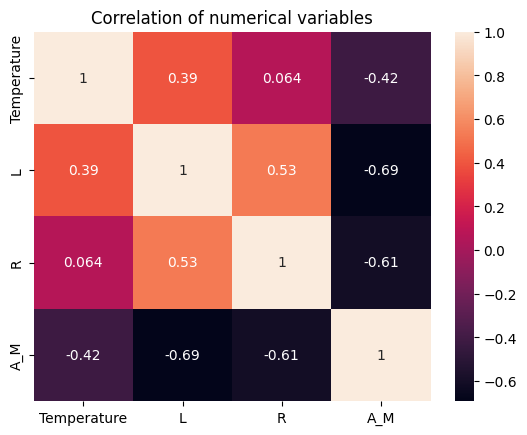

In [61]:
corr = data[['Temperature', 'L', 'R', 'A_M']].corr()
sns.heatmap(corr, annot=True);
plt.title('Correlation of numerical variables');

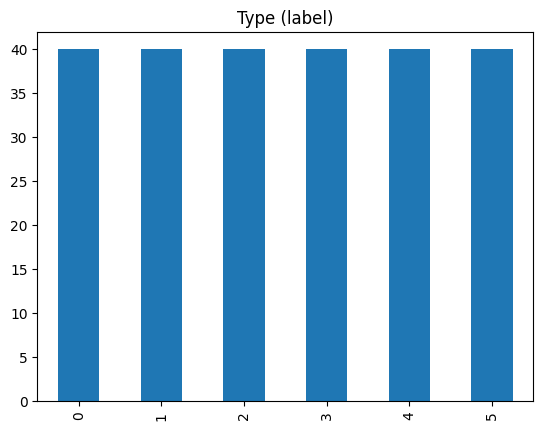

In [62]:
data['Type'].value_counts().plot(kind='bar');
plt.title('Type (label)');

# as we can see, our dataset is balanced!

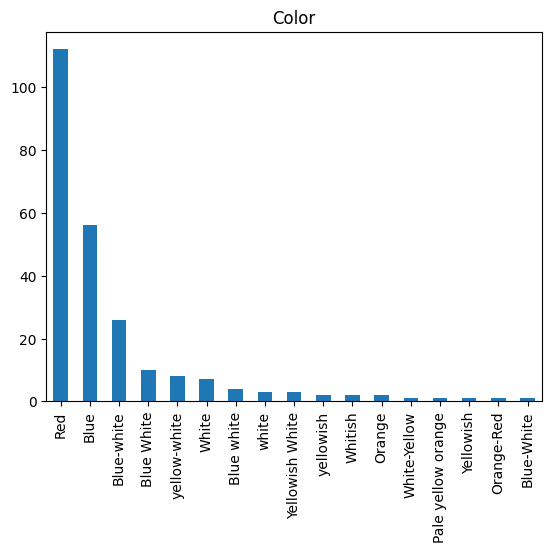

In [63]:
data['Color'].value_counts().plot(kind='bar');
plt.title('Color');

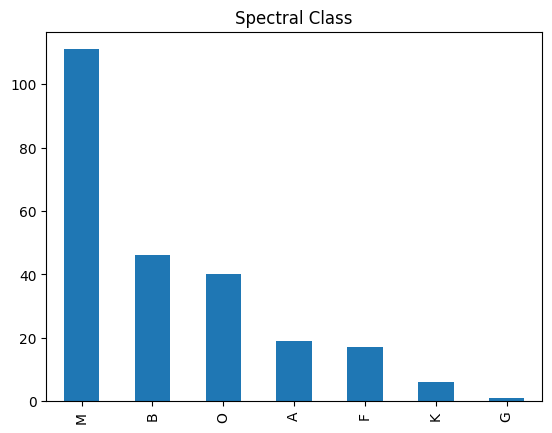

In [64]:
data['Spectral_Class'].value_counts().plot(kind='bar');
plt.title('Spectral Class');

# one-hot encoding for categorical variables

In [65]:
categorical_cols = data[['Color', 'Spectral_Class']]
one_hoted = pd.get_dummies(categorical_cols, columns=['Color', 'Spectral_Class'])
encoded_data = pd.concat([categorical_cols, one_hoted], axis=1)
encoded_data.drop(['Color', 'Spectral_Class'], inplace=True, axis=1)

In [66]:
features = pd.concat([data[['Temperature', 'L', 'R', 'A_M']], encoded_data], axis=1)
label = data[['Type']]

In [67]:
features.shape

(240, 28)

# Train

In [68]:
x_train ,x_test , y_train, y_test = train_test_split(features, label, test_size=0.4, random_state=1)

In [69]:
x_train.head(1)

,Temperature,L,R,A_M,Color_Blue,Color_Blue White,Color_Blue white,Color_Blue-White,Color_Blue-white,Color_Orange,...,Color_white,Color_yellow-white,Color_yellowish,Spectral_Class_A,Spectral_Class_B,Spectral_Class_F,Spectral_Class_G,Spectral_Class_K,Spectral_Class_M,Spectral_Class_O
48,3625,184000.0,84.0,-6.74,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [70]:
y_train.head(1)

,Type
48,4


In [71]:
scaler = StandardScaler()

pipeline = Pipeline([
    ('scaler', scaler),
    ('logreg', LogisticRegression(max_iter=1000, penalty='l1', solver='liblinear'))
])

param_grid = {
    'logreg__C': [0.1, 1, 10],
    'logreg__penalty': ['l1', 'l2'],
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1)
grid_search.fit(x_train, np.ravel(y_train))

best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Test

In [72]:
acc = best_estimator.score(x_test, y_test)

print("Best Hyperparameters:", best_params)
print("Best Accuracy:", acc)

Best Hyperparameters: {'logreg__C': 10, 'logreg__penalty': 'l2'}
Best Accuracy: 0.9895833333333334
